In [203]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [204]:
df=pd.read_csv('all_data.csv')

In [205]:
df.shape

(513451, 21)

1：删除无法处理的特征变量

In [206]:
#删除表头的换行符
df.columns = df.columns.str.replace('\n', '')

In [207]:
#删除缺失值过多和无意义的列
del df['EASE-MENT']
del df['BLOCK']
del df['LOT']
del df['ADDRESS']
del df['APARTMENT NUMBER']

In [208]:
df.shape

(513451, 16)

将Borough从数字换为区域名

In [209]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'MANHATTAN'
df['BOROUGH'][df['BOROUGH'] == 2] = 'BRONX'
df['BOROUGH'][df['BOROUGH'] == 3] = 'BROOKLYN'
df['BOROUGH'][df['BOROUGH'] == 4] = 'QUEENS'
df['BOROUGH'][df['BOROUGH'] == 5] = 'STATEN ISLAND'

In [210]:
df.shape

(513451, 16)

处理SALE PRICE, 删除缺失值‘-’，将0替换为相同zipcode内的平均数，保留在10000-100000000之间的房屋，并取对数处理

In [211]:
#  删除缺失值‘-’
df.drop(df[df['SALE PRICE'] ==' -  '].index, inplace=True)

In [212]:
df.shape

(498890, 16)

In [213]:
# 将0替换为相同zipcode内的中位数
df['SALE PRICE'] = df['SALE PRICE'].replace(0, np.nan)
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE PRICE'] = df['SALE PRICE'].fillna(df.groupby('ZIP CODE')['SALE PRICE'].transform('mean'))

In [214]:
# 保留在10000-100000000之间的房屋数据
sanityindex = (df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 100000000)
df = df[-sanityindex]

In [215]:
df["log_Sale_Price"] = df['SALE PRICE'].apply(np.log)

In [216]:
df.shape

(478792, 17)

处理TAX CLASS AS OF FINAL ROLL 18/19，删除缺失值,将小于从低到高10%分位数的值全部归为OTHER

In [217]:
df = df.dropna(subset=['TAX CLASS AS OF FINAL ROLL 18/19'])

In [218]:
df['TAX CLASS AS OF FINAL ROLL 18/19'].nunique()

11

In [219]:
TAX_CLASS_counts = df['TAX CLASS AS OF FINAL ROLL 18/19'].value_counts(normalize=True)
TAX_CLASS_counts_sorted = TAX_CLASS_counts.sort_values(ascending=False)
threshold_index = int(np.ceil(0.9 * len(TAX_CLASS_counts_sorted)))
low_freq_TAX_CLASS = TAX_CLASS_counts_sorted.index[threshold_index:]
df.loc[df['TAX CLASS AS OF FINAL ROLL 18/19'].isin(low_freq_TAX_CLASS),'TAX CLASS AS OF FINAL ROLL 18/19'] = 'OTHER'

In [220]:
df['TAX CLASS AS OF FINAL ROLL 18/19'].nunique()

11

In [221]:
df.shape

(478227, 17)

处理BUILDING CLASS AS OF FINAL ROLL 18/19，删除缺失值，将小于从低到高10%分位数的值全部归为OTHER

In [222]:
df = df.dropna(subset=['BUILDING CLASS AS OF FINAL ROLL 18/19'])

In [223]:
df['BUILDING CLASS AS OF FINAL ROLL 18/19'].nunique()

192

In [224]:
BUILDING_CLASS_counts = df['BUILDING CLASS AS OF FINAL ROLL 18/19'].value_counts(normalize=True)
BUILDING_CLASS_counts_sorted = BUILDING_CLASS_counts.sort_values(ascending=False)
threshold_index = int(np.ceil(0.9 * len(BUILDING_CLASS_counts_sorted)))
low_freq_BUILDING_CLASS = BUILDING_CLASS_counts_sorted.index[threshold_index:]
df.loc[df['BUILDING CLASS AS OF FINAL ROLL 18/19'].isin(low_freq_BUILDING_CLASS),'BUILDING CLASS AS OF FINAL ROLL 18/19'] = 'OTHER'

In [225]:
df['BUILDING CLASS AS OF FINAL ROLL 18/19'].nunique()

174

In [226]:
df.shape

(478227, 17)

处理Building Class At Time Of Sale，删除缺失值，将小于从低到高10%分位数的值全部归为OTHER

In [227]:
df = df.dropna(subset=['BUILDING CLASS AT TIME OF SALE'])

In [228]:
df['BUILDING CLASS AT TIME OF SALE'].nunique()

191

In [229]:
BUILDING_CLASS_SALE_counts = df['BUILDING CLASS AT TIME OF SALE'].value_counts(normalize=True)
BUILDING_CLASS_SALE_counts_sorted = BUILDING_CLASS_SALE_counts.sort_values(ascending=False)
threshold_index = int(np.ceil(0.9 * len(BUILDING_CLASS_SALE_counts_sorted)))
low_freq_BUILDING_CLASS_SALE = BUILDING_CLASS_SALE_counts_sorted.index[threshold_index:]
df.loc[df['BUILDING CLASS AT TIME OF SALE'].isin(low_freq_BUILDING_CLASS_SALE),'BUILDING CLASS AT TIME OF SALE'] = 'OTHER'

In [230]:
df['BUILDING CLASS AT TIME OF SALE'].nunique()

173

In [231]:
df.shape

(478227, 17)

处理ZIPCODE,删除缺失值和0值，将数据类行转换为object

In [232]:
df['ZIP CODE'] = df['ZIP CODE'].replace(0, np.nan)
df = df.dropna(subset=['ZIP CODE'])
df['ZIP CODE'] = df['ZIP CODE'].astype('object')

In [233]:
df.shape

(477185, 17)

处理RESIDENTIAL UNITS，删除缺失值

In [234]:
df = df.dropna(subset=['RESIDENTIAL UNITS'])

In [235]:
df.shape

(401146, 17)

处理COMMERCIAL UNITS，删除缺失值

In [236]:
df = df.dropna(subset=['COMMERCIAL UNITS'])

In [237]:
df.shape

(358993, 17)

处理TOTAL UNITS，删除缺失值

In [238]:
df = df.dropna(subset=['TOTAL UNITS'])

In [239]:
df.shape

(358993, 17)

处理LAND SQUARE FEET，将数据变为整数型，将缺失值和0值替换为相同zipcode内的平均数，只保留大于10的值，转换为float数据类型

In [240]:
df.drop(df[df['LAND SQUARE FEET'] ==' -  '].index, inplace=True)
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'],errors='coerce')
# df = df.dropna(subset=['LAND SQUARE FEET'])
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(df.groupby('ZIP CODE')['LAND SQUARE FEET'].transform('mean'))
df.drop(df[df['LAND SQUARE FEET'] < 10].index, inplace=True)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('float64')

In [241]:
df.shape

(270306, 17)

处理GROSS SQUARE FEET，将数据变为整数型，将缺失值和0值替换为相同zipcode内的平均数，只保留大于10的值

In [242]:
df.drop(df[df['GROSS SQUARE FEET'] ==' -  '].index, inplace=True)
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'],errors='coerce')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(df.groupby('ZIP CODE')['GROSS SQUARE FEET'].transform('mean'))
df.drop(df[df['GROSS SQUARE FEET'] < 10].index, inplace=True)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('float64')

In [243]:
df.shape

(260109, 17)

处理YEAR BUILT，将缺失值和0值替换为相同zipcode内的中位数，只保留大于1600的值

In [244]:
df['YEAR BUILT'] = df['YEAR BUILT'].replace(0, np.nan)
df['YEAR BUILT'] = df['YEAR BUILT'].fillna(df.groupby('ZIP CODE')['YEAR BUILT'].transform('median'))
df = df.dropna(subset=['YEAR BUILT'])
df.drop(df[df['YEAR BUILT'] < 1600].index, inplace=True)
df['YEAR BUILT'] = df['YEAR BUILT'].apply(lambda x: round(x)) #中位数四舍五入

In [245]:
df.shape

(260107, 17)

处理TAX CLASS AT TIME OF SALE，将数据变为object,删除缺失值

In [246]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('object')
df = df.dropna(subset=['TAX CLASS AT TIME OF SALE'])

In [247]:
df.shape

(260107, 17)

处理Neighboor，删除缺失值，将小于从低到高10%分位数的值全部归为OTHER

In [248]:
df = df.dropna(subset=['NEIGHBORHOOD'])

In [249]:
df['NEIGHBORHOOD'].nunique()

254

In [250]:
NEIGHBORHOOD_counts = df['NEIGHBORHOOD'].value_counts(normalize=True)
NEIGHBORHOOD_counts_sorted = NEIGHBORHOOD_counts.sort_values(ascending=False)
threshold_index = int(np.ceil(0.9 * len(NEIGHBORHOOD_counts_sorted)))
low_freq_NEIGHBORHOOD = NEIGHBORHOOD_counts_sorted.index[threshold_index:]
df.loc[df['NEIGHBORHOOD'].isin(low_freq_NEIGHBORHOOD),'NEIGHBORHOOD'] = 'OTHER'

In [251]:
df['NEIGHBORHOOD'].nunique()

230

In [252]:
df.shape

(260107, 17)

处理BUILDING CLASS CATEGORY，删除缺失值，将小于从低到高10%分位数的值全部归为OTHER

In [253]:
df = df.dropna(subset=['BUILDING CLASS CATEGORY'])

In [254]:
df['BUILDING CLASS CATEGORY'].nunique()

68

In [255]:
BUILDING_CLASS_CATEGORY_counts = df['BUILDING CLASS CATEGORY'].value_counts(normalize=True)
BUILDING_CLASS_CATEGORY_counts_sorted = BUILDING_CLASS_CATEGORY_counts.sort_values(ascending=False)
threshold_index = int(np.ceil(0.9 * len(BUILDING_CLASS_CATEGORY_counts_sorted)))
low_freq_BUILDING_CLASS_CATEGORY = BUILDING_CLASS_CATEGORY_counts_sorted.index[threshold_index:]
df.loc[df['BUILDING CLASS CATEGORY'].isin(low_freq_BUILDING_CLASS_CATEGORY),'BUILDING CLASS CATEGORY'] = 'OTHER'

In [256]:
df['BUILDING CLASS CATEGORY'].nunique()

63

In [257]:
df.shape

(260107, 17)

处理SALE DATE,将数据转为时间格式，只保留19-23年数据

In [258]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df = df[df['SALE DATE'].dt.year >= 2019]

In [259]:
df.shape

(178983, 17)

In [260]:
df = df.reset_index()

创建单位面积价格特征

In [261]:
df['ft_price'] = df['SALE PRICE'] / df['GROSS SQUARE FEET']
df["log_ft_price"] = df["ft_price"].apply(np.log)

In [262]:
df.dtypes

index                                             int64
BOROUGH                                          object
NEIGHBORHOOD                                     object
BUILDING CLASS CATEGORY                          object
TAX CLASS AS OF FINAL ROLL 18/19                 object
BUILDING CLASS AS OF FINAL ROLL 18/19            object
ZIP CODE                                         object
RESIDENTIAL UNITS                               float64
COMMERCIAL UNITS                                float64
TOTAL UNITS                                     float64
LAND SQUARE FEET                                float64
GROSS SQUARE FEET                               float64
YEAR BUILT                                        int64
TAX CLASS AT TIME OF SALE                        object
BUILDING CLASS AT TIME OF SALE                   object
SALE PRICE                                      float64
SALE DATE                                datetime64[ns]
log_Sale_Price                                  

In [263]:
del df['index']

In [264]:
df.describe().T

count          mean           std           min  \
RESIDENTIAL UNITS  178983.0  3.695044e+00  3.099939e+01      0.000000   
COMMERCIAL UNITS   178983.0  3.475023e-01  8.515622e+00      0.000000   
TOTAL UNITS        178983.0  4.042546e+00  3.222715e+01      0.000000   
LAND SQUARE FEET   178983.0  6.444435e+03  1.284423e+05     35.000000   
GROSS SQUARE FEET  178983.0  5.721270e+03  4.779712e+04     30.000000   
YEAR BUILT         178983.0  1.941670e+03  3.074727e+01   1800.000000   
SALE PRICE         178981.0  1.423910e+06  3.531414e+06  10000.000000   
log_Sale_Price     178981.0  1.373635e+01  7.384168e-01      9.210340   
ft_price           178981.0  5.196019e+02  1.073799e+03      0.067098   
log_ft_price       178981.0  6.026215e+00  7.316087e-01     -2.701605   

                             25%            50%           75%           max  
RESIDENTIAL UNITS       1.000000       2.000000  2.000000e+00  8.764000e+03  
COMMERCIAL UNITS        0.000000       0.000000  0.000000e+00  2.261000e+03  
TOTAL UNITS             1.000000       2.000000  2.000000e+00  8.812000e+03  
LAND SQUARE FEET     2000.000000    2500.000000  4.000000e+03  1.985040e+07  
GROSS SQUARE FEET    1428.000000    2000.000000  2.846000e+03  8.942176e+06  
YEAR BUILT           1920.000000    1931.000000  1.960000e+03  2.022000e+03  
SALE PRICE         617000.000000  844000.000000  1.228844e+06  9.976923e+07  
log_Sale_Price         13.332624      13.645908  1.402158e+01  1.841837e+01  
ft_price              316.860465     436.403509  5.909091e+02  3.250000e+05  
log_ft_price            5.758462       6.078567  6.381662e+00  1.269158e+01

In [265]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

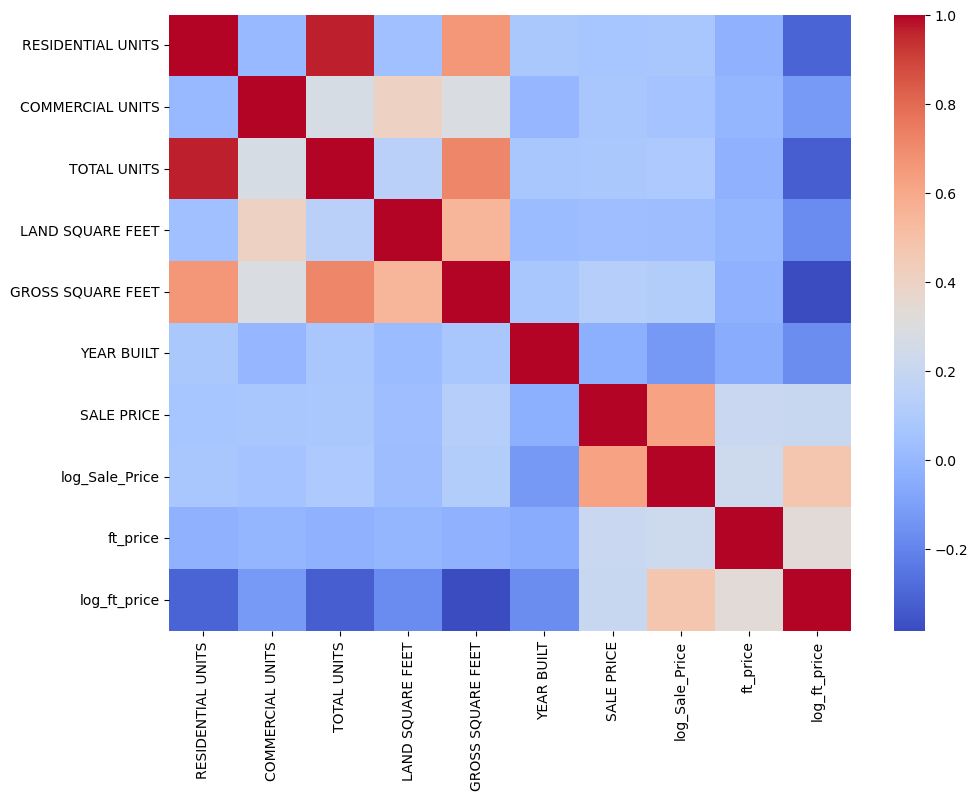

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="coolwarm",annot=False)
plt.show()

In [267]:
df.to_csv('outcome.csv')

In [268]:
corrDf=df.corr()
corrDf
corrDf['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
log_Sale_Price       0.625808
ft_price             0.210127
log_ft_price         0.202088
GROSS SQUARE FEET    0.128095
TOTAL UNITS          0.083498
COMMERCIAL UNITS     0.072336
RESIDENTIAL UNITS    0.066934
LAND SQUARE FEET     0.028448
YEAR BUILT          -0.041519
Name: SALE PRICE, dtype: float64